# I - Data preparation

Import Libraries

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import os
import cv2
import random
from sklearn.cluster import KMeans

Split image data into Train and Test

In [6]:
def create_train_test(data_path,class_name,train_size,test_size):
    directory = data_path + class_name + "/"
    print("Browsing directory "+directory)
    data = os.listdir(directory)
    random.shuffle(data) 
    train = data[:train_size] # take the first train_size images of each class for training
    test = data[train_size:train_size+test_size] # take the next test_size images for testing
    return train, test

class_list = []
data_path = "CBIR_15-Scene/"
for file in sorted(os.listdir(data_path)):
    if os.path.isdir(data_path+file):
        class_list.append(file)        
        
train_size = 5
test_size = 10
train_set = []
test_set = []
train_set_label = []
test_set_label = []
for class_name in class_list:
    train, test = create_train_test(data_path,class_name,train_size,test_size)
    train_set = train_set + train # These are the lists of image file names
    test_set = test_set + test
    train_label = [class_name] * len(train)
    test_label = [class_name] * len(test)
    train_set_label = train_set_label + train_label # These are the lists of directory names (labels)
    test_set_label = test_set_label + test_label
print("Size of training set: ",len(train_set))
print("Size of testing set: ",len(test_set))

Browsing directory CBIR_15-Scene/00/
Browsing directory CBIR_15-Scene/01/
Browsing directory CBIR_15-Scene/02/
Browsing directory CBIR_15-Scene/03/
Browsing directory CBIR_15-Scene/04/
Browsing directory CBIR_15-Scene/05/
Browsing directory CBIR_15-Scene/06/
Browsing directory CBIR_15-Scene/07/
Browsing directory CBIR_15-Scene/08/
Browsing directory CBIR_15-Scene/09/
Browsing directory CBIR_15-Scene/10/
Browsing directory CBIR_15-Scene/11/
Browsing directory CBIR_15-Scene/12/
Browsing directory CBIR_15-Scene/13/
Browsing directory CBIR_15-Scene/14/
Size of training set:  75
Size of testing set:  150


# II - Computing local descriptors on training set

Number of descriptors:  25301
Dimension of descriptors:  64
Type of descriptors:  float32
Average computation time per image: 15.33 ms


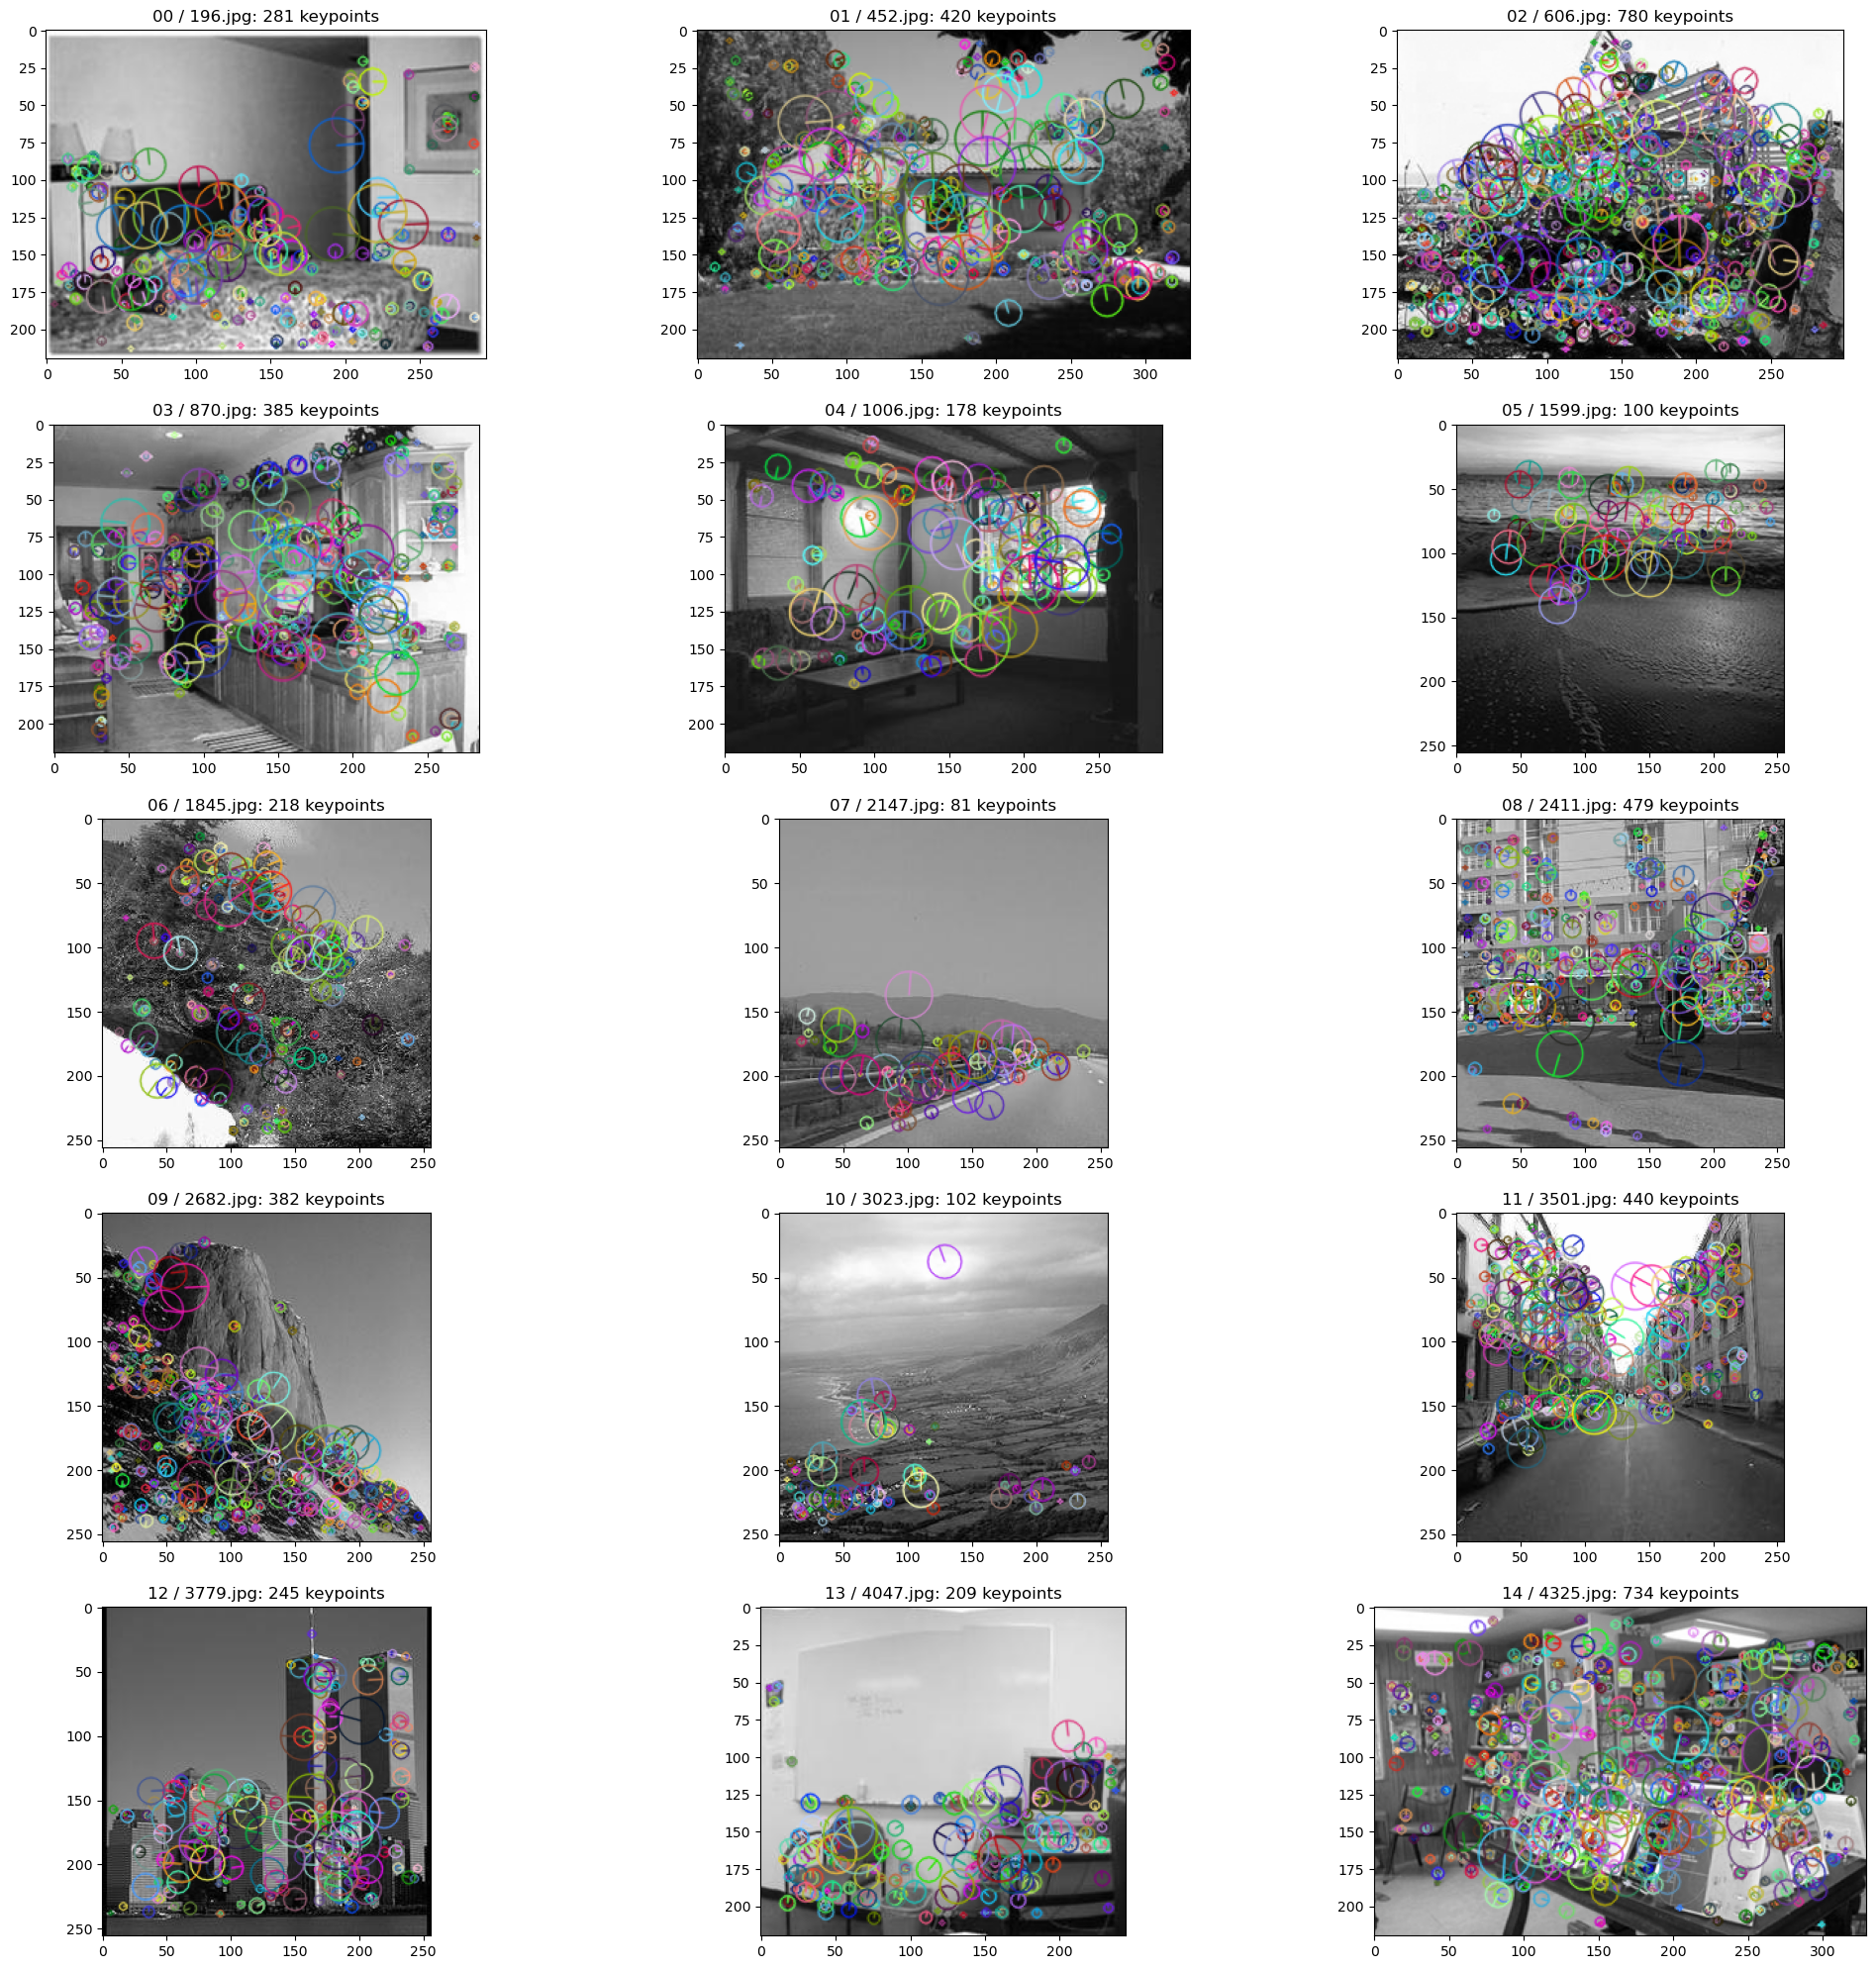

In [7]:
# Choose the keypoint method
method = "kaze"
if (method == "kaze"):
    kp = cv2.KAZE_create(upright = False,#By default : false 
                         threshold = 0.001,#By default : 0.001
                         nOctaves = 4,#By default : 4
                         nOctaveLayers = 4,#By default : 4
                         diffusivity = 2)#By default : 2
elif (method == "orb"):  
        kp = cv2.ORB_create(nfeatures = 200,#By default : 500
                            scaleFactor = 2,#By default : 1.2
                            nlevels = 3)#By default : 8
f, disp_array = plt.subplots(5,3,figsize=(25,25))
old_label = "FIRST"
[lig, col] = [0,0]
t1 = cv2.getTickCount() #OpenCV method for estimating computation time
for i in range(len(train_set)):
    img_file = data_path + train_set_label[i] + "/" + train_set[i]
    img = cv2.imread(img_file)
    #print("Dimension of image",img.shape[0],"rows x",img.shape[1],"columns")
    #print("Type of image:",img.dtype)
    pts, desc = kp.detectAndCompute(img, mask=None)
    if (old_label == "FIRST"):
        descriptors_dataset = desc
    else:
        descriptors_dataset = np.vstack((descriptors_dataset,desc))
    img_disp = cv2.drawKeypoints(img, pts, None, flags=4)
    if (train_set_label[i] != old_label): # Display keypoints as examples for first image of each class
        old_label = train_set_label[i]
        disp_array[lig,col].imshow(img_disp)
        nb_kp = str(desc.shape[0]) # Number of keypoints in one image
        disp_array[lig,col].title.set_text(train_set_label[i] + " / " + train_set[i] + ": " + nb_kp + " keypoints")
        col = col + 1
        if (col == 3):
            [lig,col] = [lig+1,0]
t2 = cv2.getTickCount()
time = (t2 - t1)/ cv2.getTickFrequency()
print("Number of descriptors: ",descriptors_dataset.shape[0])
print("Dimension of descriptors: ",descriptors_dataset.shape[1])
print("Type of descriptors: ",descriptors_dataset.dtype)
print("Average computation time per image:",round((1000*time)/len(train_set),2),"ms")

# III - Dictionary creation (here K-Means Clustering)

In [8]:
Number_words = 300
t1 = cv2.getTickCount()
kmeans = KMeans(n_clusters = Number_words,init = 'random').fit(descriptors_dataset)
t2 = cv2.getTickCount()
cluster_time = (t2 - t1)/ cv2.getTickFrequency()
print("Size of the array of cluster centres:",kmeans.cluster_centers_.shape)
print("Size of the vector of labels:",kmeans.labels_.size)
print("Computation time of clustering:",round(cluster_time,3),"s")

Size of the array of cluster centres: (300, 64)
Size of the vector of labels: 25301
Computation time of clustering: 3.63 s


# IV - Indexing the Test Data Set (To be completed)

# V - Testing CBIR on some images (To be completed)